In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('hosingdata.csv')

In [3]:
data

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [4]:
X = data.drop(['target'],axis=1)
y = data['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

# 1. Linear Relationship

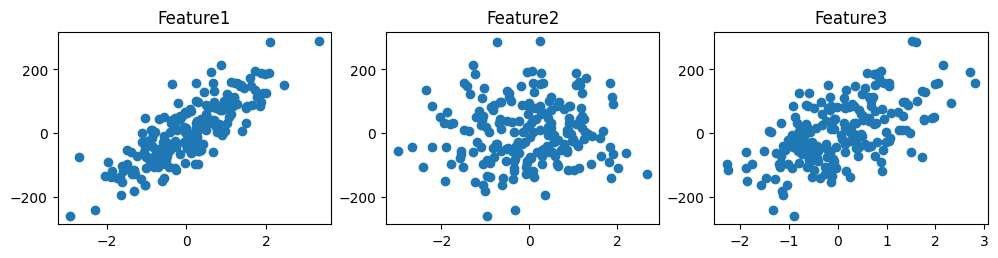

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(data['feature1'], data['target'])
ax1.set_title("Feature1")
ax2.scatter(data['feature2'], data['target'])
ax2.set_title("Feature2")
ax3.scatter(data['feature3'], data['target'])
ax3.set_title("Feature3")

plt.show()
# x-axis features , y-axis target

# 2. Multicolinearity

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [9]:
pd.DataFrame({'vif': vif}, index=data.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


In [10]:
# VIF > 1.5 indicates multicolinearity

In [11]:
#other method
data.corr()

,feature1,feature2,feature3,target
feature1,1.000000,-0.001055,0.049286,0.818926
feature2,-0.001055,1.000000,0.060387,0.031267
feature3,0.049286,0.060387,1.000000,0.578142
target,0.818926,0.031267,0.578142,1.000000


# 3. Normality of Error

In [12]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

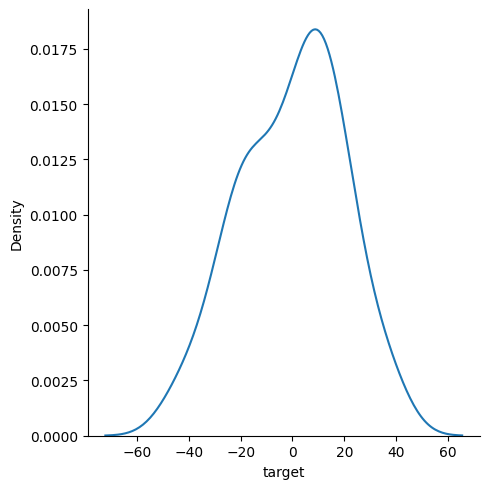

In [18]:
sns.displot(residual,kind='kde')

# 4. Homoscedasticity

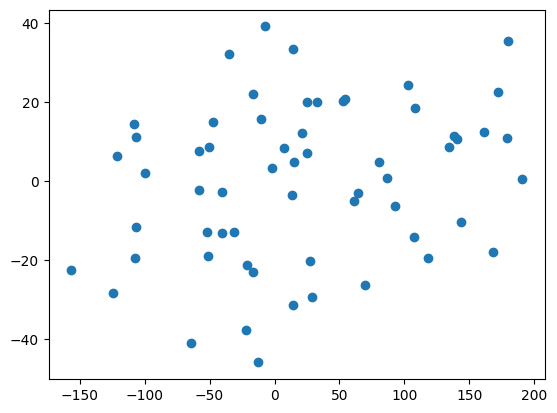

In [14]:
plt.scatter(y_pred,residual)

# 5. Autocorrelation of Residuals

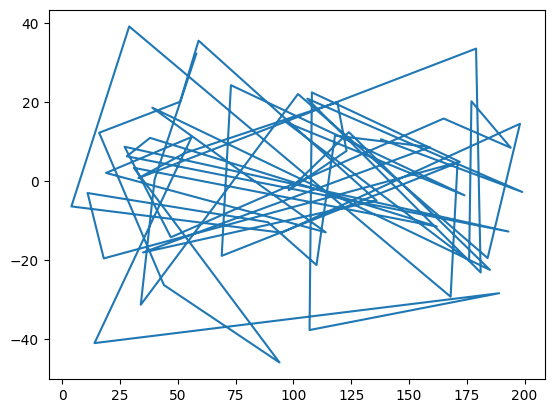

In [15]:
plt.plot(residual)